In [1]:
import os
from PIL import Image
import glob
from matplotlib import pyplot as plt
import numpy as np

In [2]:
cdir = os.listdir("./data/train")
print(cdir)

['b_leaf', 'n_ewaste', 'n_bags', 'b_wood', 'b_food', 'b_paper', 'biodegradable', 'n_metal', 'n_bottles', 'nonbiodegradable']


In [3]:
train_numbers = {}
for i in range(len(cdir)):
    train_numbers[cdir[i]] = len(os.listdir("./data/train/"+cdir[i]))
print(train_numbers)
test_numbers = {}
for i in range(len(cdir)):
    test_numbers[cdir[i]] = len(os.listdir("./data/test/"+cdir[i]))
print(test_numbers)

{'b_leaf': 9432, 'n_ewaste': 8280, 'n_bags': 9200, 'b_wood': 9488, 'b_food': 10066, 'b_paper': 8600, 'biodegradable': 119845, 'n_metal': 6700, 'n_bottles': 8757, 'nonbiodegradable': 119845}
{'b_leaf': 3152, 'n_ewaste': 2530, 'n_bags': 2438, 'b_wood': 2832, 'b_food': 2290, 'b_paper': 2120, 'biodegradable': 8363, 'n_metal': 1380, 'n_bottles': 2730, 'nonbiodegradable': 8363}


In [4]:
total_numbers = {}
for k in train_numbers.keys():
    total_numbers[k] = train_numbers[k] + test_numbers[k]
print(total_numbers)

{'b_leaf': 12584, 'n_ewaste': 10810, 'n_bags': 11638, 'b_wood': 12320, 'b_food': 12356, 'b_paper': 10720, 'biodegradable': 128208, 'n_metal': 8080, 'n_bottles': 11487, 'nonbiodegradable': 128208}


In [5]:
before_numbers = {'b_leaf': 1473, 'n_ewaste': 235, 'n_bags': 253, 'b_wood': 662, 'b_food': 10295, 'b_paper': 1072, 'biodegradable': 128208, 'n_metal': 1039, 'n_bottles': 547, 'nonbiodegradable': 128208}

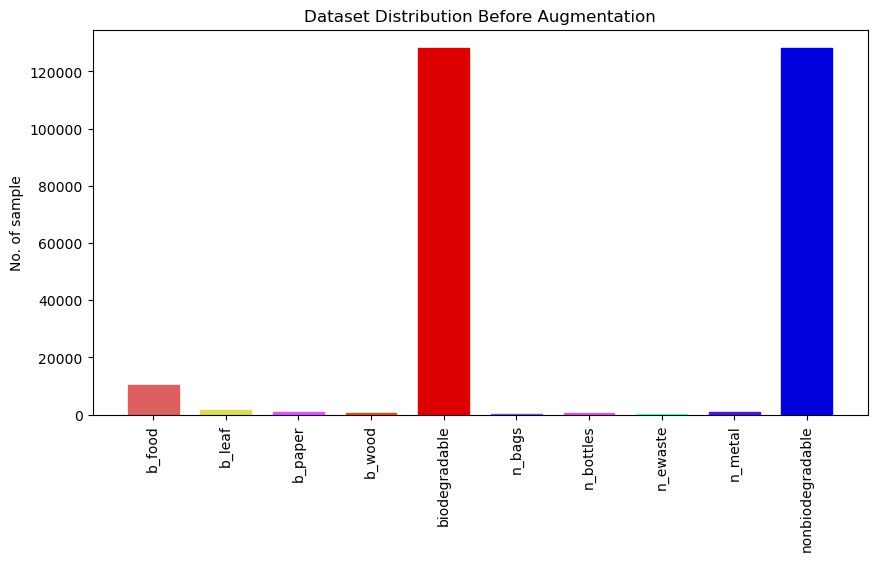

In [36]:
fig, ax = plt.subplots(figsize=(10, 5))

x = list(sorted(before_numbers))
y = [before_numbers[k] for k in sorted(before_numbers)]
# creating the bar plot
barlist = ax.bar(x, y, width = 0.7)
barlist[0].set_color('#dd5f5f')
barlist[1].set_color('#dddd55')
barlist[2].set_color('#dd55ff')
barlist[3].set_color('#dd5115')
barlist[4].set_color('#dd0000')

barlist[5].set_color('#5f5fdd')
barlist[6].set_color('#dd55dd')
barlist[7].set_color('#55ffdd')
barlist[8].set_color('#5115dd')
barlist[9].set_color('#0000dd')
ax.set_xticks(np.arange(len(x)), x)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylabel("No. of sample")
ax.set_title("Dataset Distribution Before Augmentation")
plt.show()

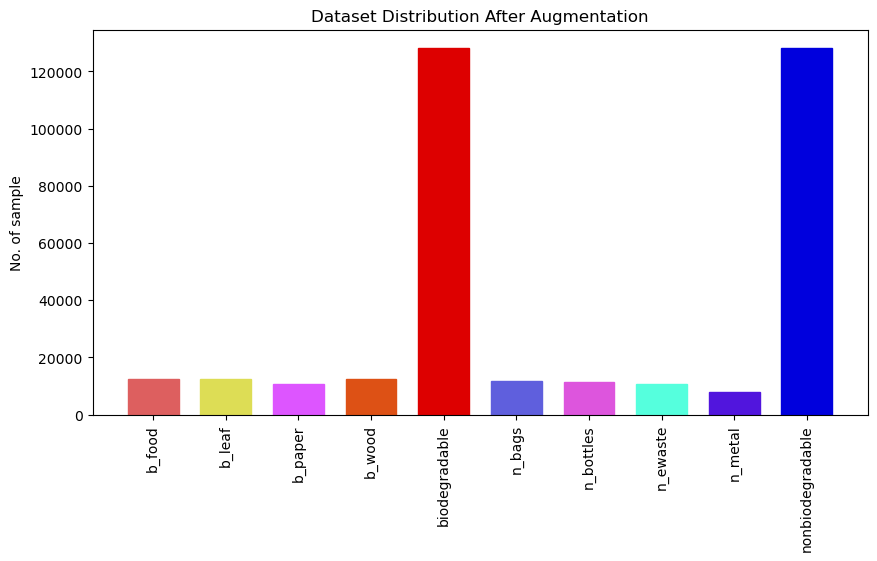

In [38]:
fig, ax = plt.subplots(figsize=(10, 5))

x = list(sorted(total_numbers))
y = [total_numbers[k] for k in sorted(total_numbers)]
# creating the bar plot
barlist = ax.bar(x, y, width = 0.7)
barlist[0].set_color('#dd5f5f')
barlist[1].set_color('#dddd55')
barlist[2].set_color('#dd55ff')
barlist[3].set_color('#dd5115')
barlist[4].set_color('#dd0000')

barlist[5].set_color('#5f5fdd')
barlist[6].set_color('#dd55dd')
barlist[7].set_color('#55ffdd')
barlist[8].set_color('#5115dd')
barlist[9].set_color('#0000dd')
ax.set_xticks(np.arange(len(x)), x)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylabel("No. of sample")
ax.set_title("Dataset Distribution After Augmentation")
plt.show()

In [37]:
# fig, ax = plt.subplots()
# y_pos = np.arange(len(list(sorted(before_numbers))))
# hbars = ax.barh(list(sorted(before_numbers)), [before_numbers[k] for k in sorted(before_numbers)], align='center')
# ax.set_yticks(y_pos, labels=list(sorted(before_numbers)))
# ax.invert_yaxis()  # labels read top-to-bottom
# ax.set_xlabel('Performance')
# ax.set_title('How fast do you want to go today?')
# # Label with specially formatted floats
# ax.bar_label(hbars, fmt='%.2f')
# # ax.set_xlim(right=15)  # adjust xlim to fit labels

# plt.show()

In [19]:
x = os.listdir("./data/test/b_food")
# print(x)
for i in range(len(x)):
    x[i] = int((x[i].split("_")[1]).split(".")[0])
x.sort()
print(len(x)) 
length = len(x)

1145


In [7]:
from torch.utils.data import DataLoader, Dataset
import torchvision
import torch
from torchvision import transforms as T

/home/izzet/anaconda3/envs/computervision/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [20]:
rotater = torchvision.transforms.RandomRotation(degrees=(0, 180))
cropper = torchvision.transforms.RandomCrop(size=(224, 224))
policy = T.AutoAugmentPolicy.IMAGENET
augmenter = T.AutoAugment(policy)

# length = 69
counter = 0
for i in range(length):
    original = Image.open("./data/test/b_food/"+"t1_"+str(i)+".jpg")
    # original.show()
    for j in range(1):
        augmented = augmenter(original)
        # augmented.show()
        augmented.save("./data/test/b_food/"+"t1_"+str(length+counter)+".jpg")
        counter += 1
    

In [2]:
d1dir = os.listdir("./Dataset/2")
print(d1dir)

['TEST', 'TRAIN.1', 'TRAIN.2', 'TRAIN.3', 'TRAIN.4']


In [4]:
d1dir = os.listdir("./Dataset/2/TRAIN.1/B")
sample = cv2.imread("./Dataset/2/TRAIN.1/B/"+d1dir[0])
cv2.imshow("sample",sample)
cv2.waitKey(0)
cv2.destroyAllWindows()
print(sample.shape)

(200, 200, 3)


In [5]:
sample = cv2.resize(sample, dsize=(224,224), interpolation=cv2.INTER_LINEAR)
cv2.imshow("sample2",sample)
cv2.waitKey(0)
cv2.destroyAllWindows()
print(sample.shape)

(224, 224, 3)


In [6]:
cv2.imwrite("./data/train/1.jpg", sample)

True

In [78]:
path = "./Dataset/train/non_biodegradable/plastic_bottles/"
dataNames = os.listdir(path)
print(len(dataNames))

417


In [79]:
for i in range(len(dataNames)):
    imageName = dataNames[i]
    image = cv2.imread(path+imageName)
    image = cv2.resize(image, dsize=(224,224), interpolation=cv2.INTER_LINEAR)
    name = "./data/train/n_bottles/t1_" + str(i) + ".jpg"
    cv2.imwrite(name, image)